In [1]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
sales = pd.read_csv('kc_house_data.csv',dtype=dtype_dict)

In [4]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [5]:
sales_train = pd.read_csv('kc_house_train_data.csv',dtype=dtype_dict)

In [6]:
sales_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [7]:
sales_test = pd.read_csv('kc_house_test_data.csv',dtype=dtype_dict)

In [8]:
sales_test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0114101516,20140528T000000,310000.0,3.0,1.0,1430.0,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780.0,12697.0
1,9297300055,20150124T000000,650000.0,4.0,3.0,2950.0,5000,2,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140.0,4000.0
2,1202000200,20141103T000000,233000.0,3.0,2.0,1710.0,4697,1.5,0,0,...,6,1710,0,1941,0,98002,47.3048,-122.218,1030.0,4705.0
3,8562750320,20141110T000000,580500.0,3.0,2.5,2320.0,3980,2,0,0,...,8,2320,0,2003,0,98027,47.5391,-122.070,2580.0,3980.0
4,7589200193,20141110T000000,535000.0,3.0,1.0,1090.0,3000,1.5,0,0,...,8,1090,0,1929,0,98117,47.6889,-122.375,1570.0,5080.0


In [9]:
def simple_linear_regression(input_feature, output):
    n = input_feature.size
    sum_y = output.sum()
    sum_x = input_feature.sum()
    sum_xy = (output*input_feature).sum()
    sum_x_sq = (input_feature*input_feature).sum()
    slope = (sum_xy - sum_x*sum_y/n)/(sum_x_sq-sum_x*sum_x/n)
    intercept = sum_y/n - slope*sum_x/n
    return(intercept, slope)

In [10]:
intercept, slope = simple_linear_regression(sales_train['sqft_living'], sales_train['price'])

In [11]:
print intercept, slope

-47116.0790729 281.95883963


In [12]:
intercept + slope*2650

700074.8459475137

In [13]:
def get_residual_sum_of_squares(input_feature, output, intercept, slope):
    rss = (output - (intercept + slope * input_feature)).pow(2).sum()
    return(rss)

In [14]:
rss_train_sqft_price = get_residual_sum_of_squares(sales_train['sqft_living'], sales_train['price'], intercept, slope)
rss_train_sqft_price

1201918354177286.2

In [15]:
from decimal import Decimal

'%.2E' % Decimal(rss_train_sqft_price)

'1.20E+15'

In [16]:
def inverse_regression_predictions(output, intercept, slope):
    estimated_input = (output-intercept)/slope
    return(estimated_input)

In [17]:
inverse_regression_predictions(800000, intercept, slope)

3004.3962451522766

In [18]:
intercept_bedroom, slope_bedroom = simple_linear_regression(sales_train['bedrooms'], sales_train['price'])

In [19]:
print intercept_bedroom, slope_bedroom

109473.177623 127588.952934


In [20]:
get_residual_sum_of_squares(sales_test['sqft_living'], sales_test['price'], intercept, slope)

275402933617813.1

In [21]:
get_residual_sum_of_squares(sales_test['bedrooms'], sales_test['price'], intercept_bedroom, slope_bedroom)

493364585960301.4

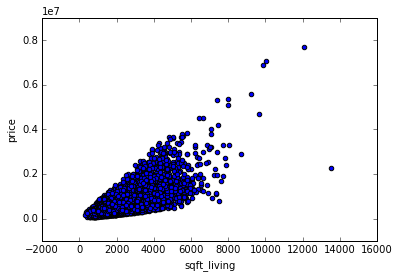

In [22]:
sales.plot.scatter(x='sqft_living', y='price')

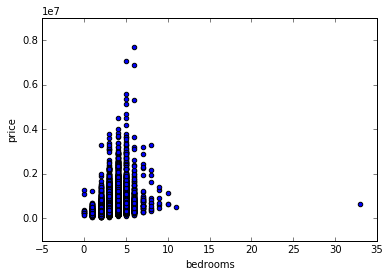

In [23]:
sales.plot.scatter(x='bedrooms', y='price')